In [ ]:
import yfinance as yf

: 

In [ ]:
#imoprting relevant libraries
import pandas as pd
import math
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import datetime

: 

In [3]:
end_date = datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
end_date_main = datetime.datetime.strptime(end_date, '%Y-%m-%d') - datetime.timedelta(days = 1)

In [4]:
#getting data
df = yf.download('TSLA', start='2010-06-29', end=end_date_main)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [6]:
df.columns = df.columns.droplevel(1)

In [7]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [8]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03
mean,81.524477,81.524477,83.333101,79.630925,81.540503,9.667521e+07
std,107.619429,107.619429,110.102721,105.051568,107.686347,7.773093e+07
min,1.053333,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.097667,12.097667,12.356666,11.812833,12.156333,4.899405e+07
50%,17.924666,17.924666,18.206333,17.661334,17.943000,8.201895e+07
75%,177.909996,177.909996,182.379997,174.542503,177.807503,1.223918e+08
max,479.859985,479.859985,488.540009,457.510010,475.899994,9.140820e+08


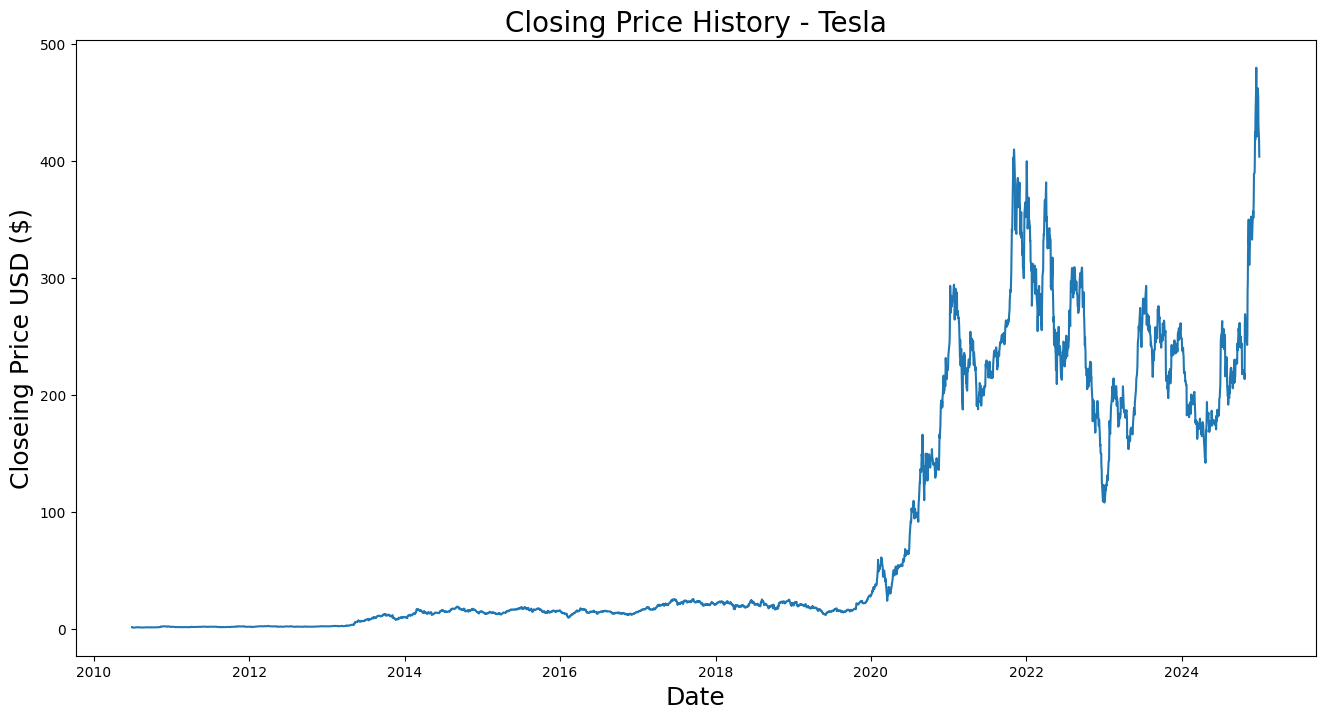

In [9]:
plt.figure(figsize=(16, 8))
plt.title('Closing Price History - Tesla', fontsize = 20)
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closeing Price USD ($)', fontsize=18)
plt.show()

In [10]:
close_df = df['Close']

In [11]:
train_data, test_data = train_test_split(close_df, test_size=0.2, shuffle=False)

In [12]:
train_data

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2022-01-27    276.366669
2022-01-28    282.116669
2022-01-31    312.239990
2022-02-01    310.416656
2022-02-02    301.886658
Name: Close, Length: 2921, dtype: float64

In [13]:
#Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1,1))

In [14]:
train_data_scaled

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.76100262],
       [0.75654369],
       [0.73568369]])

In [15]:
test_data_scaled = scaler.transform(test_data.values.reshape(-1,1))

In [16]:
test_data_scaled

array([[0.72384755],
       [0.75007951],
       [0.73705316],
       [0.74900349],
       [0.75715506],
       [0.73477888],
       [0.69846339],
       [0.7113104 ],
       [0.74935395],
       [0.75013652],
       [0.71179132],
       [0.69600164],
       [0.66710411],
       [0.62024045],
       [0.65018139],
       [0.65759934],
       [0.70696558],
       [0.70202565],
       [0.71467698],
       [0.68158142],
       [0.68076623],
       [0.65328713],
       [0.66944362],
       [0.6976238 ],
       [0.68077437],
       [0.6457632 ],
       [0.62213979],
       [0.65109434],
       [0.68234765],
       [0.70791928],
       [0.73546361],
       [0.74831875],
       [0.80767881],
       [0.81186064],
       [0.82393314],
       [0.82125943],
       [0.88745055],
       [0.89375181],
       [0.88920317],
       [0.8758427 ],
       [0.88154065],
       [0.93115145],
       [0.88697777],
       [0.84988792],
       [0.85926231],
       [0.83336455],
       [0.79296514],
       [0.801

In [17]:
# Create sequences of data
def create_sequences(data, time_steps):
    x = []
    y = []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, 0])  # Data from i-time_steps to i
        y.append(data[i, 0])  # The target value (next day's price)
    return np.array(x), np.array(y)

In [18]:
# Create training and test sequences
time_steps = 60  # Use the past 60 days to predict the next day's price
x_train, y_train = create_sequences(train_data_scaled, time_steps)
x_test, y_test = create_sequences(test_data_scaled, time_steps)

In [19]:
# Reshape the input to 3D format: (samples, time_steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)  # (samples, time_steps, features)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)  # (samples, time_steps, features)

In [20]:
model = Sequential()

In [21]:
# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # LSTM with 50 units
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

C:\Users\shobh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dropout(0.2))  # Dropout layer

In [23]:
# Add a Dense layer for output
model.add(Dense(units=1))  # Output layer with 1 unit (next day's stock price)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 8.6555e-04 - val_loss: 0.0026
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 7.5072e-04 - val_loss: 0.0024
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - loss: 7.5133e-04 - val_loss: 0.0024
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 9.1853e-04 - val_loss: 0.0020
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 9.4651e-04 - val_loss: 0.0019
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 8.6359e-04 - val_loss: 0.0018
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 6.8498e-04 - val_loss: 0.0018
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 5.5089e-04 - val_loss: 0.0017
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 7.7151e-04 - val_loss: 0.0014
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 5.8237e-04 - val_loss: 0.0017
Epoch 12/50
90/90 ━━━━

In [26]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 7.8090e-04
Test Loss: 0.0007976692286320031


In [27]:
# Make predictions
predictions = model.predict(x_test)

# Invert the scaling to get the actual stock prices
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print the predictions and actual values
print(f"Predicted: {predictions[:5]}")
print(f"Actual: {y_test_actual[:5]}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
Predicted: [[291.2244 ]
 [293.4571 ]
 [298.00427]
 [307.0143 ]
 [304.621  ]]
Actual: [[300.98001099]
 [303.08334351]
 [317.54000854]
 [291.09332275]
 [288.54998779]]


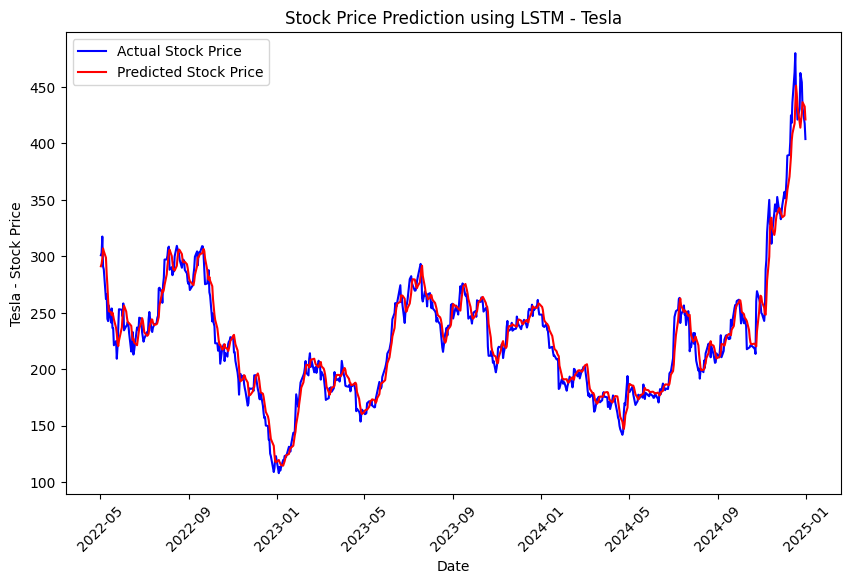

In [28]:
plt.figure(figsize=(10, 6))

# Plot actual vs predicted prices for the test set
plt.plot(test_data.index[time_steps:], y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(test_data.index[time_steps:], predictions, color='red', label='Predicted Stock Price')

# Labeling the graph
plt.title('Stock Price Prediction using LSTM - Tesla')
plt.xlabel('Date')
plt.ylabel('Tesla - Stock Price')
plt.legend()

# Display the plot with proper date formatting
plt.xticks(rotation=45)
plt.show()

In [29]:
# Get the last `time_steps` days from the test set
last_sequence = test_data_scaled[-time_steps:]

# Reshape it for the model's input (it needs to be 3D: samples, time_steps, features)
last_sequence = last_sequence.reshape(1, time_steps, 1)

# Predict the next day (for the first prediction)
next_day_prediction = model.predict(last_sequence)

# Store predictions and recursively predict the next 7 days
predictions_next_month = []

# Predict the next 7 days
for i in range(7):
    predictions_next_month.append(next_day_prediction[0, 0])
    
    # Update the input sequence with the newly predicted value
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)
    
    # Predict the next day
    next_day_prediction = model.predict(last_sequence)

# Invert the scaling to get the actual stock prices (reverse the MinMax scaling)
predictions_next_month = scaler.inverse_transform(np.array(predictions_next_month).reshape(-1, 1))

# Show the predictions for the next 7 days
print(predictions_next_month)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[407.17776]
 [399.72543]
 [394.45532]
 [390.51376]
 [387.3947 ]
 [384.7921 ]
 [382.49802]]


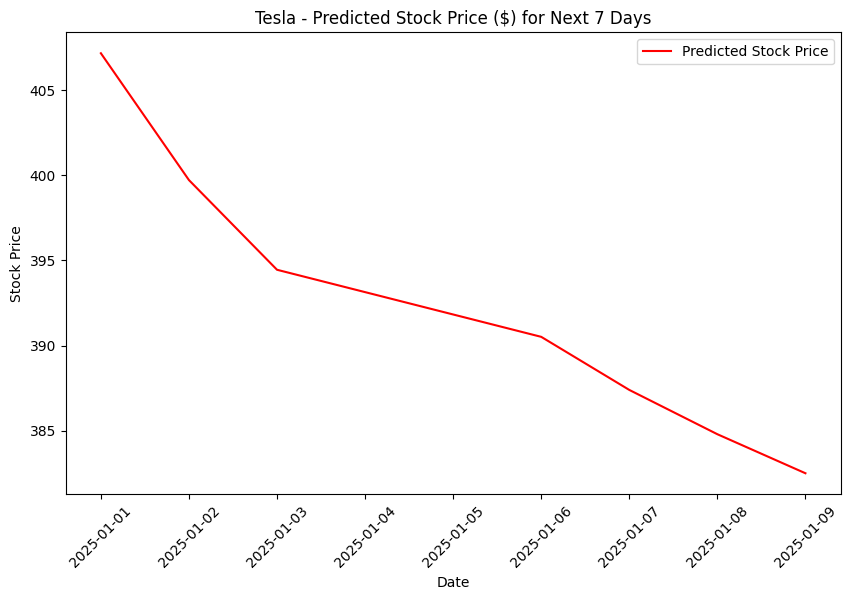

In [30]:
last_date = test_data.index[-1]  # Assuming the test_data has a DateTimeIndex

# Generate the next 30 business days (or calendar days depending on your requirement)
next_30_days = pd.date_range(start=last_date, periods=8, freq='B')[1:]  # Excluding the last date in the test data

# Plotting the predicted stock prices for the next 30 days
plt.figure(figsize=(10, 6))
plt.plot(next_30_days, predictions_next_month, color='red', label='Predicted Stock Price')

# Labeling the graph
plt.title('Tesla - Predicted Stock Price ($) for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

In [31]:
import joblib

In [32]:
joblib.dump(model, "Tesla Share Price Predictor")

['Tesla Share Price Predictor']